# BOOK RECOMMENDATION PROJECT


Load the Dataset,
Dataset url: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
#import three dataset i.e books,users,ratings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Manager\Anaconda3\lib\site-packages\IPython\core\interactiveshell

Study the each dataset for further processing

In [2]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
books.shape

(271360, 8)

In [4]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
users.shape

(278858, 3)

In [6]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Plot the count of rating

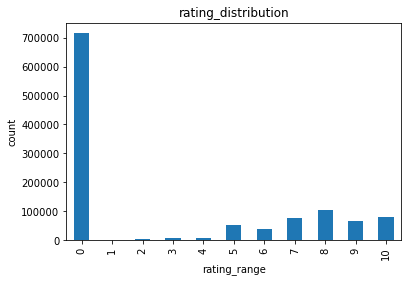

In [7]:
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('rating_range')
plt.ylabel('count')
plt.title('rating_distribution')
plt.show()

Above distribution shows that the most of the book rating is not available.

In [8]:
ratings.shape

(1149780, 3)

Drop unwwanted columns of books dataset

In [9]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [10]:
books=books.drop(['bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1)

In [11]:
books.head()

,ISBN,bookTitle
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [12]:
ratings.bookRating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

In [13]:
users.userID.value_counts()

2047      1
66165     1
119407    1
76400     1
74353     1
         ..
26022     1
32165     1
30116     1
19875     1
2049      1
Name: userID, Length: 278858, dtype: int64

In [14]:
users.shape

(278858, 3)

The above study of dataset give the understanding of size of dataset including type of data we have. Now we build model based recommendation technique with the help of KNN

# Collaborative filtering using KNN

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [15]:
#merge the dataset of ratings with books on ISBN and create new dataset of merge_rating
merge_rating=ratings.merge(books,on='ISBN')

In [16]:
merge_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [17]:
merge_rating.isnull().sum()

userID        0
ISBN          0
bookRating    0
bookTitle     0
dtype: int64

Now we will find combined rating given to each books.
therefore we apply groupby function on booktitle and count function on bookrating

In [18]:
totalcount=merge_rating.groupby(by='bookTitle')['bookRating'].count()
totalcount.head()

bookTitle
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
Name: bookRating, dtype: int64

In [19]:
type(totalcount)

pandas.core.series.Series

Change pandas series into pandas dataframe

In [20]:
totalcount1=totalcount.reset_index().rename(columns = {'bookRating': 'totalRatingCount'})[['bookTitle', 'totalRatingCount']]

In [21]:
type(totalcount1)

pandas.core.frame.DataFrame

In [22]:
totalcount1.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Again merge the dataset of merge_rating with totalcount

In [24]:
totalcount2=pd.merge(merge_rating,totalcount1,left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
totalcount2.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [25]:
totalcount2.shape

(1031136, 5)

In [26]:
threshold = 50
rating_popular_book = totalcount2.query('totalRatingCount >= @threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [27]:
#after aplying threshold value the number of users decrease by almost 8lac
rating_popular_book.shape

(288740, 5)

In [28]:
filter_count= rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = filter_count[filter_count['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


# KNN implementation

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [29]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
#print(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [30]:
us_canada_user_rating_pivot

userID,8,9,14,16,17,23,26,32,39,42,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
bookTitle,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#return number of row/last row index number
us_canada_user_rating_pivot.shape[0]

2442

In [32]:
#now use random index number
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)

2091


In [33]:
#this will give the row number 1735 all value corresponds to each users
us_canada_user_rating_pivot.iloc[query_index,:]

userID
8         0.0
9         0.0
14        0.0
16        0.0
17        0.0
         ... 
278843    0.0
278844    0.0
278846    0.0
278851    0.0
278854    0.0
Name: The Queen of the Damned (Vampire Chronicles (Paperback)), Length: 40017, dtype: float64

In [34]:
#convert the above serie into array with the help of values method
a=us_canada_user_rating_pivot.iloc[query_index,:].values
a

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
type(a)

numpy.ndarray

In [36]:
a.shape

(40017,)

In [37]:
#convert 1d array into 2D matrix for the use of model
b=a.reshape(1,-1)

In [38]:
b

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
b.shape

(1, 40017)

In [40]:
#apply KNN model on country based filtered dataset and find the distance and index value of 6 neighbors surrounding by selected index/row
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [41]:
#index value 0f 2091
us_canada_user_rating_pivot.index[query_index]

'The Queen of the Damned (Vampire Chronicles (Paperback))'

In [42]:
#flatten function 2D array into 1D
c=distances.flatten()
c.shape

(6,)

In [43]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i])) 

Recommendations for The Queen of the Damned (Vampire Chronicles (Paperback)):

1: The Tale of the Body Thief (Vampire Chronicles (Paperback)), with distance of 0.5598518534922678:
2: The Vampire Lestat (Vampire Chronicles, Book II), with distance of 0.593752583803033:
3: Interview with the Vampire, with distance of 0.7003115307103882:
4: Memnoch the Devil (Vampire Chronicles, No 5), with distance of 0.7458007809522389:
5: Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches), with distance of 0.8269312318153519:


The above recommendation engine give first recommendation of "The Queen of the Damned (Vampire Chronicles (Paperback))" is "The Tale of the Body Thief (Vampire Chronicles (Paperback))" because this booktitle has lowest distance from the book and the same pattern follows for rest.

# Conclusion

Our recommendation Engine is Model based Engine and we have used KNN model for the recommendation of the book. 


For the similiairy we have used cosine similairy to get to know the similairy between different book title. 

There are many other option to check the similarity between booktitle for example user based similairy,content based similarity,item based similarity.

In our model we have use rating based similarity.